In [1]:
import pandas as pd

In [11]:
# Load CSV
df = pd.read_csv("D:/pythone data cleaning project/BI calculation project/BI-calculations_raw_data.csv")

In [17]:
# Verify the first few rows of the dataset
print("Initial Data Preview:")
print(df.head())  # Show top 5 rows to inspect initial data

Initial Data Preview:
      CID         TID  Gender     Age Group       Purchase Date  \
0  943146  5876328741  Female         25-45 2023-08-30 20:27:08   
1  180079  1018503182    Male         25-45 2024-02-23 09:33:46   
2  337580  3814082218   Other  60 and above 2022-03-06 09:09:50   
3  180333  1395204173   Other  60 and above 2020-11-04 04:41:57   
4  447553  8009390577    Male         18-25 2022-05-31 17:00:32   

   Product Category Discount Availed    Discount Name  Discount Amount (INR)  \
0       Electronics              Yes        FESTIVE50                  64.30   
1       Electronics              Yes  SEASONALOFFER21                 175.19   
2          Clothing              Yes  SEASONALOFFER21                 211.54   
3  Sports & Fitness               No              NaN                   0.00   
4  Sports & Fitness              Yes         WELCOME5                 439.92   

   Gross Amount   Net Amount Purchase Method   Location  
0    725.304000   661.004000     Cre

In [15]:
# Convert date and ensure numerical columns
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], dayfirst=True)
df['Gross Amount'] = pd.to_numeric(df['Gross Amount'], errors='coerce')
df['Net Amount'] = pd.to_numeric(df['Net Amount'], errors='coerce')
df['Discount Amount (INR)'] = pd.to_numeric(df['Discount Amount (INR)'], errors='coerce')

In [19]:
print("\nConverted 'Purchase Date' to DateTime:")
print(df['Purchase Date'].head())  # Verify the conversion


Converted 'Purchase Date' to DateTime:
0   2023-08-30 20:27:08
1   2024-02-23 09:33:46
2   2022-03-06 09:09:50
3   2020-11-04 04:41:57
4   2022-05-31 17:00:32
Name: Purchase Date, dtype: datetime64[ns]


In [21]:
# Verify conversion by checking the data types
print("\nData Types after Conversion:")
print(df.dtypes)


Data Types after Conversion:
CID                               int64
TID                               int64
Gender                           object
Age Group                        object
Purchase Date            datetime64[ns]
Product Category                 object
Discount Availed                 object
Discount Name                    object
Discount Amount (INR)           float64
Gross Amount                    float64
Net Amount                      float64
Purchase Method                  object
Location                         object
dtype: object


In [23]:
# Check if there are any remaining missing values
print("\nMissing Values after Imputation:")
print(df.isnull().sum())  # Ensure no missing data


Missing Values after Imputation:
CID                          0
TID                          0
Gender                       0
Age Group                    0
Purchase Date                0
Product Category             0
Discount Availed             0
Discount Name            27585
Discount Amount (INR)        0
Gross Amount                 0
Net Amount                   0
Purchase Method              0
Location                     0
dtype: int64


In [27]:
# Fill missing values
df['Discount Name'].fillna('No Discount', inplace=True)

In [29]:
# Check if there are any remaining missing values
print("\nMissing Values after Imputation:")
print(df.isnull().sum())  # Ensure no missing data


Missing Values after Imputation:
CID                      0
TID                      0
Gender                   0
Age Group                0
Purchase Date            0
Product Category         0
Discount Availed         0
Discount Name            0
Discount Amount (INR)    0
Gross Amount             0
Net Amount               0
Purchase Method          0
Location                 0
dtype: int64


In [31]:
# To Verify the 'Discount Name' missing values are filled with 'No Discount'
print("Initial Data Preview:")
print(df.head())  # Show top 5 rows to inspect initial data

Initial Data Preview:
      CID         TID  Gender     Age Group       Purchase Date  \
0  943146  5876328741  Female         25-45 2023-08-30 20:27:08   
1  180079  1018503182    Male         25-45 2024-02-23 09:33:46   
2  337580  3814082218   Other  60 and above 2022-03-06 09:09:50   
3  180333  1395204173   Other  60 and above 2020-11-04 04:41:57   
4  447553  8009390577    Male         18-25 2022-05-31 17:00:32   

   Product Category Discount Availed    Discount Name  Discount Amount (INR)  \
0       Electronics              Yes        FESTIVE50                  64.30   
1       Electronics              Yes  SEASONALOFFER21                 175.19   
2          Clothing              Yes  SEASONALOFFER21                 211.54   
3  Sports & Fitness               No      No Discount                   0.00   
4  Sports & Fitness              Yes         WELCOME5                 439.92   

   Gross Amount   Net Amount Purchase Method   Location  
0    725.304000   661.004000     Cre

In [33]:
# Add a Month column
df['Month'] = df['Purchase Date'].dt.to_period('M')

In [35]:
# Drop duplicates
df.drop_duplicates(inplace=True)
# data cleaning is done

In [53]:
# Key Calculations
# Total revenue from all transactions (after discounts)
total_revenue = df['Net Amount'].sum()
print("Total Revenue (Net Amount):", total_revenue)

Total Revenue (Net Amount): 158177239.558525


In [55]:
# Total discounts given across all transactions
total_discount = df['Discount Amount (INR)'].sum()
print("Total Discount Given:", total_discount)

Total Discount Given: 7534273.7700000005


In [57]:
# Average Net Amount per transaction
average_order_value = df['Net Amount'].mean()
print("Average Order Value (AOV):", average_order_value)

Average Order Value (AOV): 2875.949810155


In [43]:
# Count of unique customers
unique_customers = df['CID'].nunique()
print("Total Unique Customers:", unique_customers)

Total Unique Customers: 29071


In [45]:
# Total number of transactions
total_transactions = df['TID'].nunique()
print("Total Transactions:", total_transactions)

Total Transactions: 55000


In [47]:
# Grouped revenue by product category
revenue_by_category = df.groupby('Product Category')['Net Amount'].sum().sort_values(ascending=False)
print("\nRevenue by Product Category:")
print(revenue_by_category)


Revenue by Product Category:
Product Category
Electronics          4.748257e+07
Clothing             3.122038e+07
Beauty and Health    2.418552e+07
Sports & Fitness     1.613983e+07
Home & Kitchen       1.589259e+07
Books                7.932802e+06
Other                6.209626e+06
Pet Care             4.637088e+06
Toys & Games         4.476831e+06
Name: Net Amount, dtype: float64


In [59]:
# Sales amount split by gender
sales_by_gender = df.groupby('Gender')['Net Amount'].sum()
print("\nSales by Gender:")
print(sales_by_gender)


Sales by Gender:
Gender
Female   52713317.955
Male     51900709.810
Other    53563211.793
Name: Net Amount, dtype: float64


In [61]:
# monthly_sales
df['Month'] = df['Purchase Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Net Amount'].sum()
print("\nMonthly Sales Trend:")
print(monthly_sales)


Monthly Sales Trend:
Month
2019-09    925324.466
2019-10   2698057.996
2019-11   2713950.203
2019-12   3203418.832
2020-01   2097640.517
              ...    
2024-05   2822687.252
2024-06   2487853.815
2024-07   2521484.421
2024-08   2927157.445
2024-09   1671926.479
Freq: M, Name: Net Amount, Length: 61, dtype: float64


C:\Users\SHUBHAM\AppData\Local\Temp\ipykernel_8588\562461260.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
D:\PythonAnaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


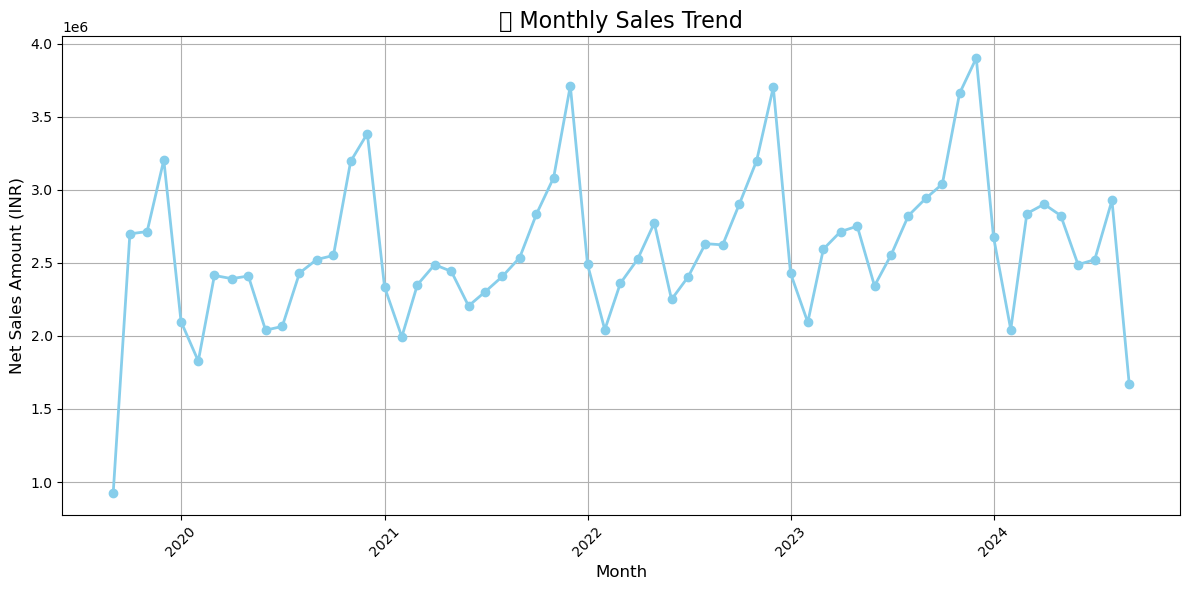

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Group by Month and sum Net Amount
monthly_sales = df.groupby('Month')['Net Amount'].sum().reset_index()

# Step 3 Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Net Amount'], marker='o', color='skyblue', linewidth=2)

plt.title('📈 Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Net Sales Amount (INR)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [73]:
# finding the Top 5 Cities by Revenue
top_cities = df.groupby('Location')['Net Amount'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Cities by Revenue:")
print(top_cities)


Top 5 Cities by Revenue:
Location
Mumbai      32083841.028
Delhi       31098974.702
Bangalore   23619545.624
Hyderabad   15813386.272
Chennai     12635181.748
Name: Net Amount, dtype: float64


In [75]:
# Percent of transactions with discount applied
discount_used = df['Discount Availed'].value_counts(normalize=True) * 100
print("\nDiscount Utilization Rate (%):")
print(discount_used)


Discount Utilization Rate (%):
Discount Availed
No    50.155
Yes   49.845
Name: proportion, dtype: float64


In [77]:
# Count of each payment method
payment_counts = df['Purchase Method'].value_counts()

# Percentage distribution
payment_percent = df['Purchase Method'].value_counts(normalize=True) * 100

# Combine into one DataFrame
payment_stats = pd.DataFrame({
    'Count': payment_counts,
    'Percentage (%)': payment_percent.round(2)
})

print(payment_stats)

                    Count  Percentage (%)
Purchase Method                          
Credit Card         22096          40.170
Debit Card          13809          25.110
Net Banking          5485           9.970
International Card   2815           5.120
Cash on Delivery     2768           5.030
PhonePe UPI          2683           4.880
Paytm UPI            2674           4.860
Google Pay UPI       2670           4.850


In [79]:
# Count of each discount
discount_counts = df['Discount Name'].value_counts()

# Percentage of each discount
discount_percent = df['Discount Name'].value_counts(normalize=True) * 100

# Combine both
top_discounts = pd.DataFrame({
    'Count': discount_counts,
    'Percentage (%)': discount_percent.round(2)
})

print(top_discounts)

                 Count  Percentage (%)
Discount Name                         
No Discount      27585          50.150
NEWYEARS          8135          14.790
SEASONALOFFER21   6940          12.620
FESTIVE50         4115           7.480
SAVE10            4115           7.480
WELCOME5          4110           7.470


In [81]:
# Filter out rows with 'No discount' or missing discount names
discounted_df = df[df['Discount Name'].notna() & (df['Discount Name'].str.lower() != 'no discount')]

# Count and percentage distribution
discount_counts = discounted_df['Discount Name'].value_counts()
discount_percent = discounted_df['Discount Name'].value_counts(normalize=True) * 100

# Combine into one DataFrame
top_discounts = pd.DataFrame({
    'Count': discount_counts,
    'Percentage (%)': discount_percent.round(2)
})

print(top_discounts)


                 Count  Percentage (%)
Discount Name                         
NEWYEARS          8135          29.670
SEASONALOFFER21   6940          25.310
FESTIVE50         4115          15.010
SAVE10            4115          15.010
WELCOME5          4110          14.990


In [87]:
# Group transactions by Gender
transactions_by_gender = df.groupby('Gender')['Net Amount'].sum()

# Print or check the result (optional)
print("\nTransactions by Gender:")
print(transactions_by_gender)



Transactions by Gender:
Gender
Female   52713317.955
Male     51900709.810
Other    53563211.793
Name: Net Amount, dtype: float64


In [109]:
from IPython.display import FileLink

# Save to current directory
df.to_csv('BI-sales-report.csv', index=False)

# Provide a clickable download link
FileLink('BI-sales-report.csv')

C:\Users\SHUBHAM\BI-sales-report.csv